# Построение графа связей навыков по выбранной вакансии

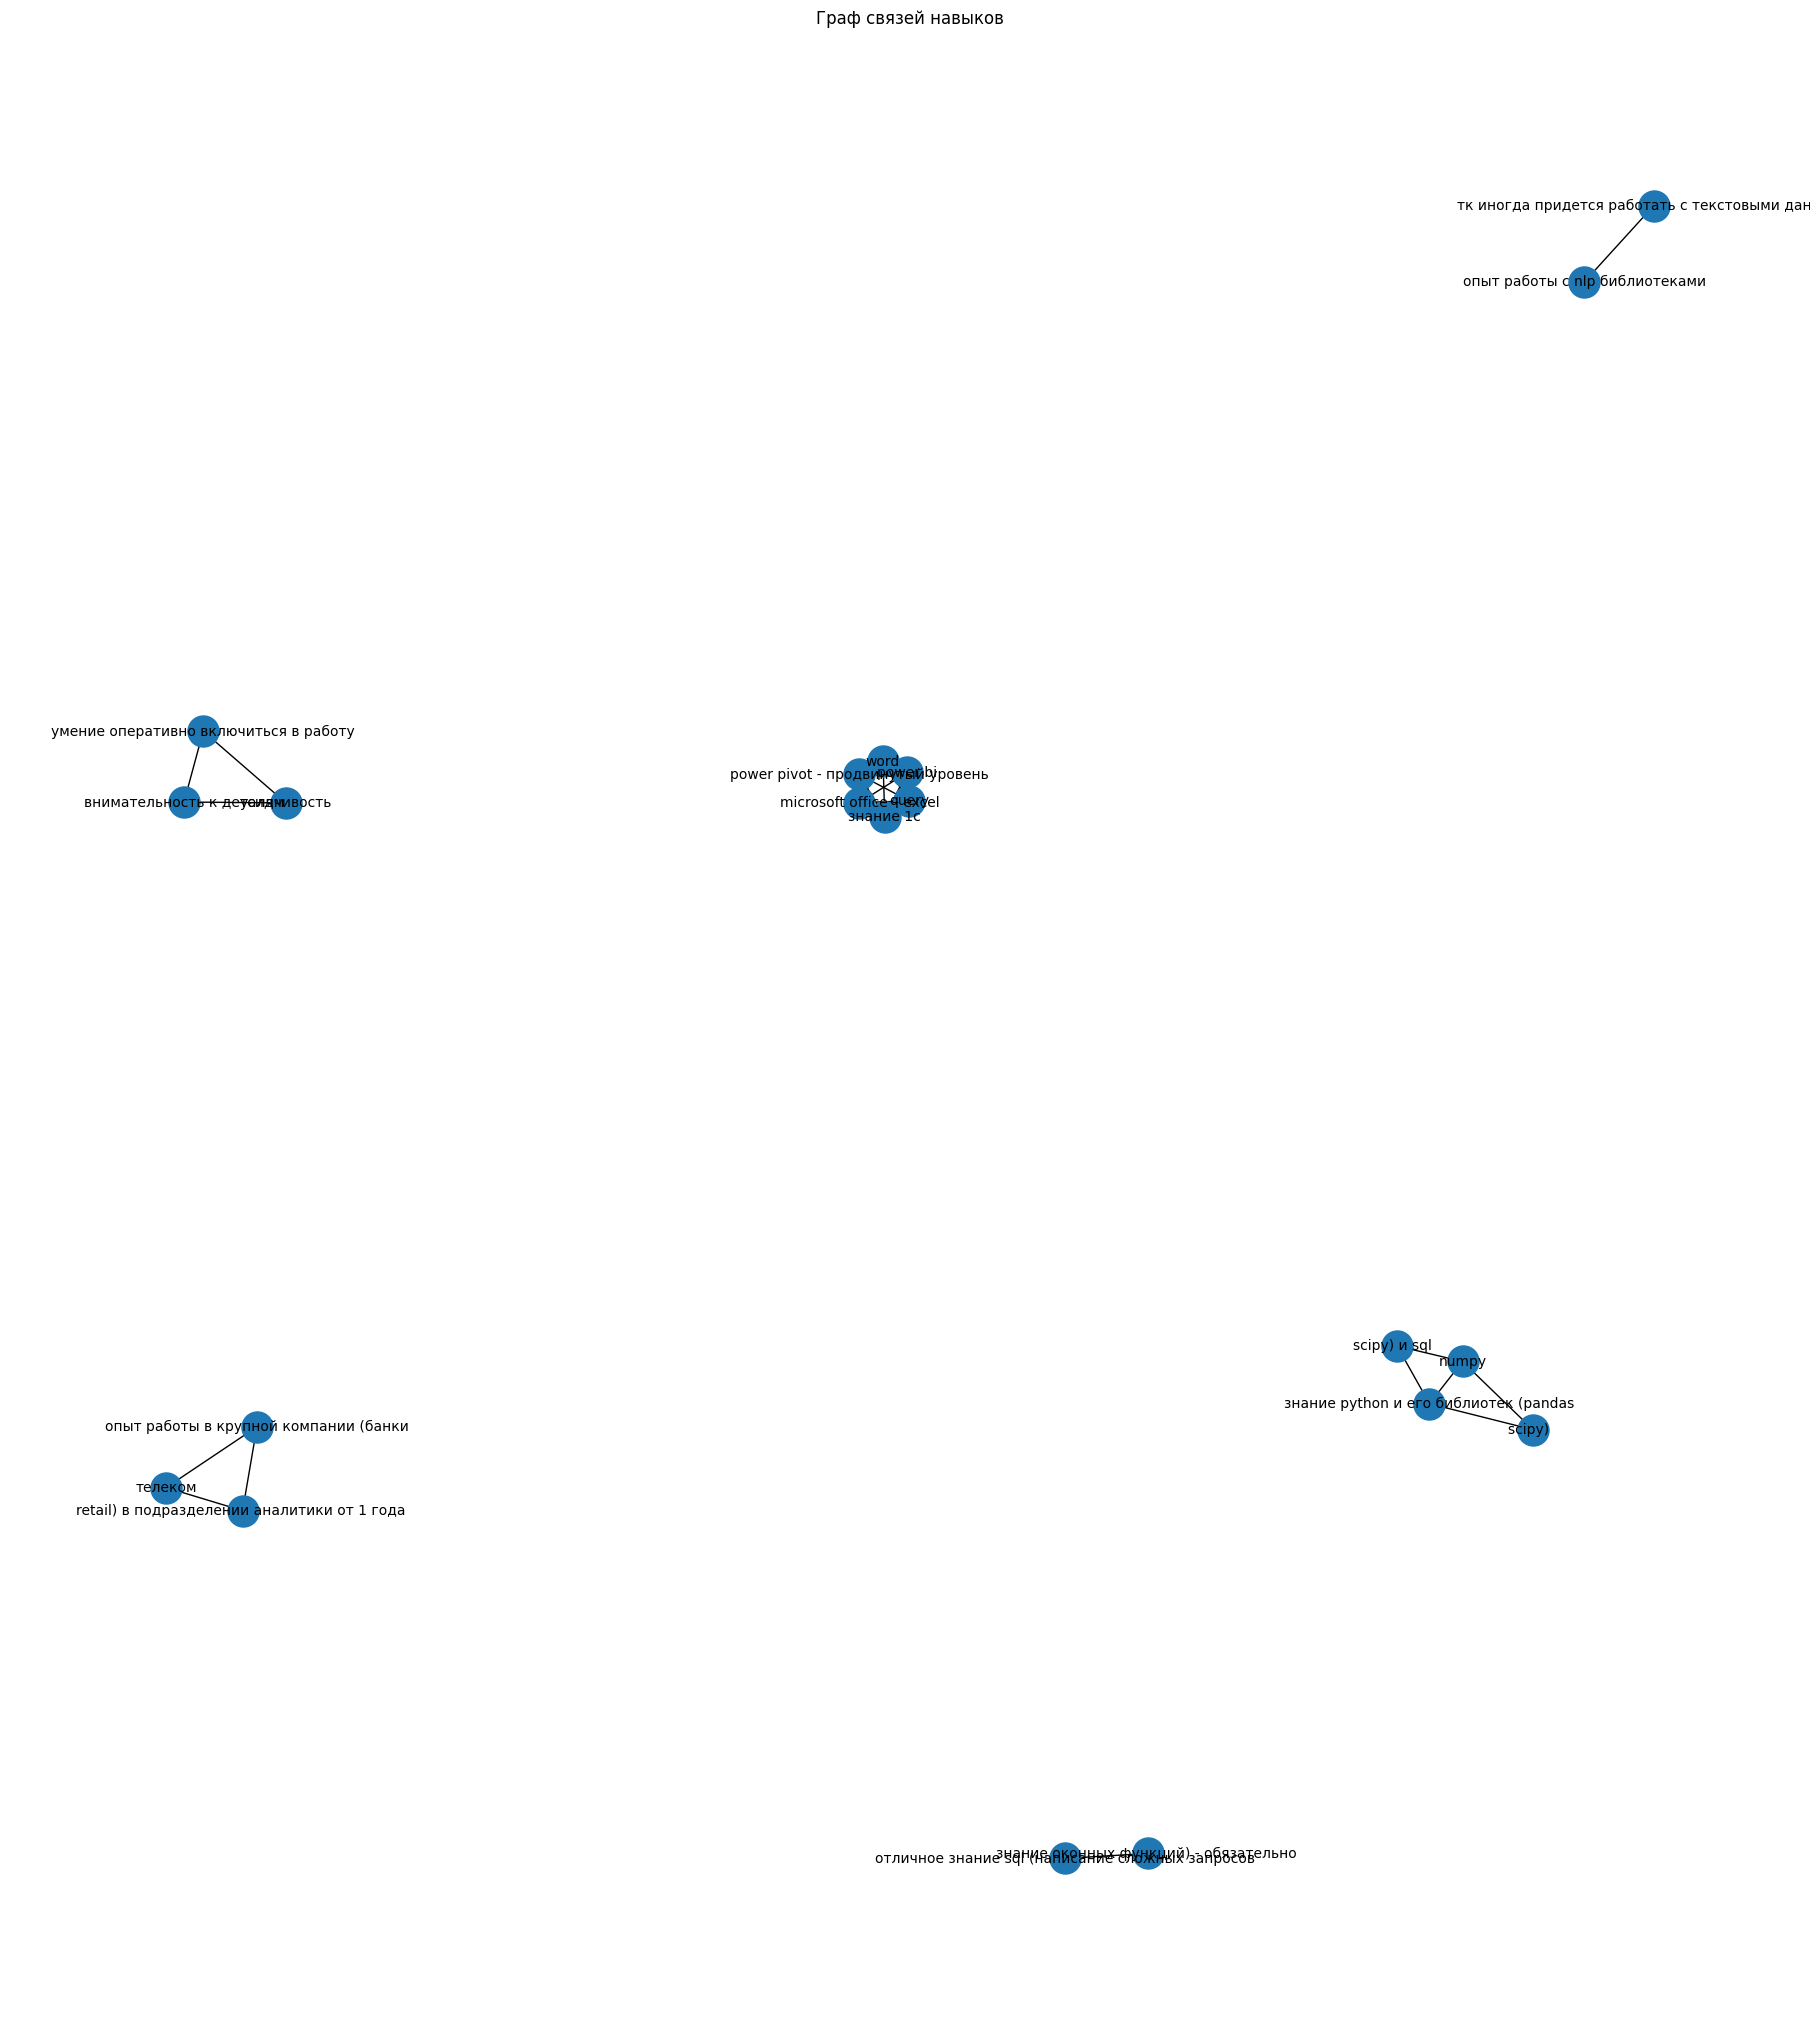

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import dash
from dash import dcc, html
import plotly.graph_objs as go
import dash_cytoscape as cyto
# Загрузка данных из файла Excel
df = pd.read_excel('replace_finish_test.xlsx')

# Создание графа
G = nx.Graph()

# Добавление ребер между навыками, которые упоминаются вместе в одной вакансии
for index, row in df.iterrows():
    skills = row['Навыки'].split(', ')
    for i in range(len(skills)):
        for j in range(i+1, len(skills)):
            if G.has_edge(skills[i], skills[j]):
                G[skills[i]][skills[j]]['weight'] += 1
            else:
                G.add_edge(skills[i], skills[j], weight=1)

# Расчет основных метрик графа
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# Визуализация графа
plt.figure(figsize=(18, 20))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, font_size=10)
plt.title("Граф связей навыков")
plt.show()
 
# Создание интерактивного приложения с использованием Dash
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(
        figure=go.Figure(
            data=[go.Scatter(x=list(degree_centrality.keys()), y=list(degree_centrality.values()), mode='markers')],
            layout=go.Layout(title="Центральность по степени")
        )
    ),
    dcc.Graph(
        figure=go.Figure(
            data=[go.Scatter(x=list(betweenness_centrality.keys()), y=list(betweenness_centrality.values()), mode='markers')],
            layout=go.Layout(title="Центральность по посредничеству")
        )
    ),
    dcc.Graph(
        figure=go.Figure(
            data=[go.Scatter(x=list(closeness_centrality.keys()), y=list(closeness_centrality.values()), mode='markers')],
            layout=go.Layout(title="Центральность по близости")
        )
    )
])

# Запуск приложения
if __name__ == '__main__':
    app.run_server(port=8080)



1. Центральность по степени (Degree Centrality):
   - Описание: Центральность по степени основана на количестве ребер, инцидентных узлу. Узлы с более высокой степенью (большим количеством связей) считаются более центральными.
   - Стандартные значения: Центральность по степени может быть нормализована от 0 до 1, где 1 соответствует узлу с наибольшей степенью, а 0 - узлу с наименьшей степенью.

2. Центральность по посредничеству (Betweenness Centrality):
   - Описание: Центральность по посредничеству измеряет, насколько узел находится на пути между другими узлами в сети. Узлы с более высоким посредничеством могут контролировать поток информации в графе.
   - Стандартные значения: Центральность по посредничеству обычно нормализуется от 0 до 1, где 1 соответствует узлу, через который проходит наибольшее количество кратчайших путей между другими узлами.

3. Центральность по близости (Closeness Centrality):
   - Описание: Центральность по близости измеряет, насколько близок узел ко всем остальным узлам в графе. Узлы с высокой центральностью по близости имеют более короткие средние расстояния до всех остальных узлов.
   - Стандартные значения: Центральность по близости может быть нормализована от 0 до 1, где 1 соответствует узлу, который является самым близким ко всем остальным узлам, а 0 - узлу, наиболее удаленному от всех остальных узлов.


# Функция интерактивного взаимодействия с графом

In [10]:
import pandas as pd
import networkx as nx
import dash
from dash import dcc, html
import dash_cytoscape as cyto

# Загрузка данных из файла Excel
df = pd.read_excel('replace_finish_test.xlsx')

# Создание графа
G = nx.Graph()

# Добавление ребер между навыками, которые упоминаются вместе в одной вакансии
for index, row in df.iterrows():
    skills = row['Навыки'].split(', ')
    for i in range(len(skills)):
        for j in range(i+1, len(skills)):
            if G.has_edge(skills[i], skills[j]):
                G[skills[i]][skills[j]]['weight'] += 1
            else:
                G.add_edge(skills[i], skills[j], weight=1)

# Расчет координат для визуализации графа в Cytoscape

pos = nx.spring_layout(G)

elements = []
for node in G.nodes():
    elements.append({'data': {'id': node, 'label': node}, 'position': {'x': pos[node][0]*100, 'y': pos[node][1]*100}})

for edge in G.edges():
    elements.append({'data': {'source': edge[0], 'target': edge[1]}})
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
# Создание интерактивного приложения с использованием Dash
app = dash.Dash(__name__)

app.layout = html.Div(
    style={'background-color': '#f0f0f0', 'padding': '20px'},
    children=[
        cyto.Cytoscape(
            id='graph',
            layout={'name': 'preset'},
            elements=elements,
            stylesheet=[{
                'selector': 'node',
                'style': {
                    'background-color': '#0077cc',
                    'label': 'data(label)'
                }
            }, {
                'selector': 'edge',
                'style': {
                    'line-color': 'black'
                }
            }],
            style={'width': '100%', 'height': '700px'}
        )
    ])
 
# Запуск приложения
if __name__ == '__main__':
    app.run_server(port=8080)
